In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns={"Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)

In [6]:
df

,CustomerID,Genre,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
income        0
score         0
dtype: int64

In [10]:
df.drop(columns=["CustomerID","Genre","Age"],inplace=True)

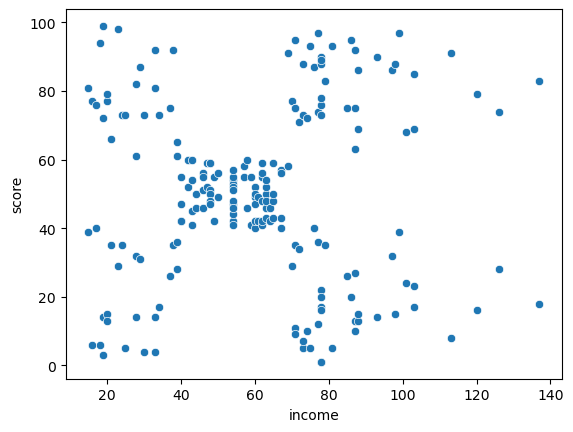

In [11]:
sns.scatterplot(x="income",y="score",data=df)
plt.show()

In [12]:
# for unsupervised machine learning there is no output variable 

In [13]:
x=df

# Kmeans Clustering

- find the optimal number of clusters - Elbow curve


In [15]:
WCSS=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
print(WCSS)    
    

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30273.394312070042, 25011.920255473757, 21826.93630323166, 19669.710998301212]


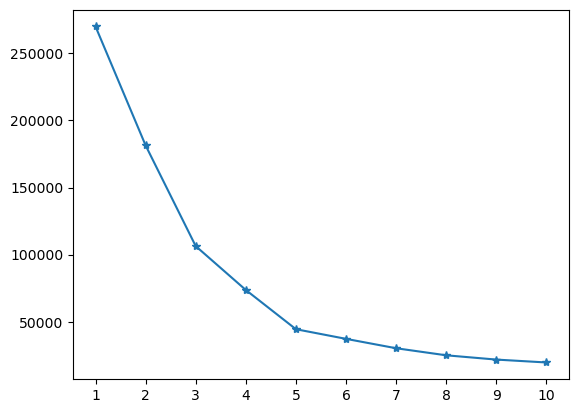

In [19]:

plt.plot(range(1,11),WCSS,marker="*")
plt.xticks(range(1,11))
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=True)
x["k_Cluster"]=kmeans.fit_predict(x)

In [22]:
x["k_Cluster"]

0      4
1      2
2      4
3      2
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: k_Cluster, Length: 200, dtype: int32

In [23]:
x

,income,score,k_Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


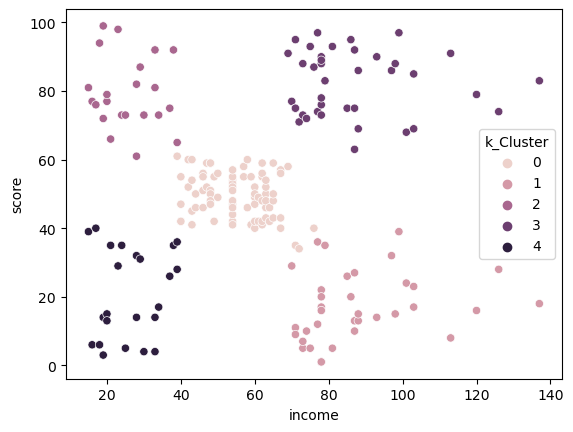

In [24]:
sns.scatterplot(x="income",y="score",hue="k_Cluster",data=x)
plt.show()

# observation
- cluster 0 : Average income,Average Spending score - can target these set of customers by providing low cost EMI's
- cluster 1 : High income,low Spending score - target these set of customers by asking feedbacks and advertising products
- cluster 2 : low income,High Spending score - may not target these set of customers based on mail policy 
- cluster 3 : High income,High Spending score - can target these set of customers by providing new product alerts which leads to increase in revenue collected by mail as loyal customers  
- cluster 4 : low income,low Spending score - cannot  target these set of customers

# 2. Hirarchial Clustering

- identifying the optimal number of clusters using dendogram

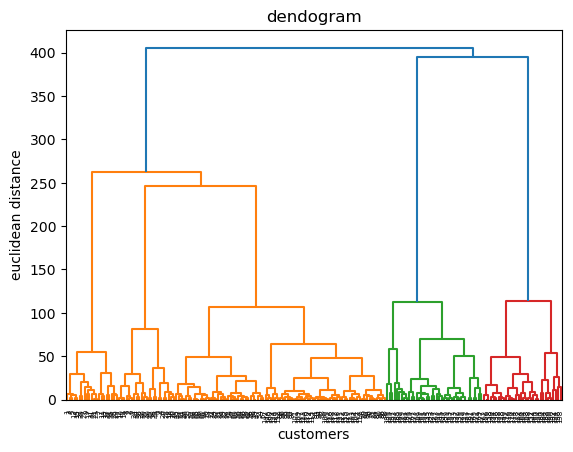

In [35]:
import scipy.cluster.hierarchy as sch

data=sch.linkage(x, method ="ward")
dendrogram=sch.dendrogram(data)
plt.title("dendogram")
plt.xlabel("customers")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
#  Hierarchial clustering method

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
x["hcluster"]=hc.fit_predict(x)

In [37]:
x

,income,score,k_Cluster,hcluster
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,3,2
196,126,28,1,0
197,126,74,3,2
198,137,18,1,0


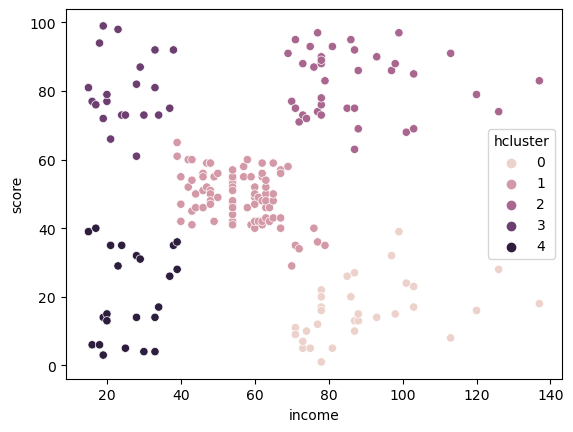

In [41]:
sns.scatterplot(x="income",y="score",hue="hcluster",data=x)
plt.show()

# DBSCAN Clustering

In [49]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        x["dbcluster"]=dbs.fit_predict(x)
        
        if x["dbcluster"].nunique()==5:
            break
print("eps:",r) 
print("min_samples:",m)
            
            
    

eps: 9
min_samples: 8


In [50]:
from sklearn.cluster import DBSCAN

dbs=DBSCAN(eps=9,min_samples=8)
x["dbcluster"]=dbs.fit_predict(x)

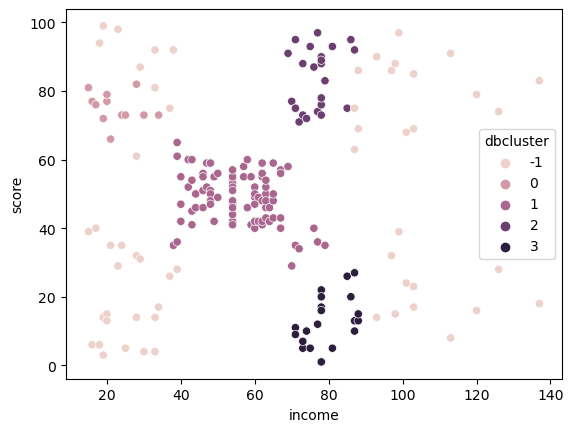

In [51]:
sns.scatterplot(x="income",y="score",hue="dbcluster",data=x)
plt.show()